In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
df1 = pd.read_csv("df-for-bert.csv")
df2 = pd.read_csv("df-for-bert-with-UD.csv")

In [4]:
df2 = df2[df2['Labels'] != 0]

In [5]:
df1 = df1.drop('Unnamed: 0', 1)

C:\Users\anton\AppData\Local\Temp/ipykernel_18916/2460593677.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('Unnamed: 0', 1)


In [6]:
df2['Labels'].replace({1:2}, inplace=True)

In [7]:
df2

,Unnamed: 0,n,Labels,comment_text
5,5789,NaN,2,99 Och stadsplaneringen verkar sega efter rejä...
7,5965,NaN,2,png mercedes benz på chaasinr wdbl meter i tjä...
9,4943,NaN,2,du kan citera mig i framtiden eftersom det kom...
19,5491,NaN,2,fjäder i hatten för Sverige det här ska de int...
24,132,62.0,2,hur kan man tro att det varit en olyckshändels...
...,...,...,...,...
6216,466,59.0,2,frågan om det var planerat eller stundens ingi...
6217,5734,NaN,2,samt ljuger de för allmänheten svensk polis i ...
6220,5191,NaN,2,ok experten jag demolerar nu också mitt fantas...
6221,5226,NaN,2,han ska inte vara med här punkt


In [8]:
df1

,n,Labels,comment_text
0,25.0,0,kan ju också varit så att det var riksdagen so...
1,12.0,0,sverige har haft många terrordåd innan bland ...
2,31.0,1,fattar inte varför folk hänger upp sig på att ...
3,16.0,0,rapporterade avpixlat om för någon timme sedan...
4,24.0,0,hemskt det som hänt undra om det kommer en an...
...,...,...,...
8655,NaN,1,Det har bara kommit från avpixlat jag har inte...
8656,43.0,0,största anledningen till det lyckade gripet är...
8657,NaN,1,vad fan hjälper det han fick god tid på sig at...
8658,24.0,0,hade lika gärna kunnat vara en själv som drabb...


In [15]:
frames = [df1, df2]
result = pd.concat(frames)

In [16]:
result = result.drop('Unnamed: 0', 1)

C:\Users\anton\AppData\Local\Temp/ipykernel_18916/3399838942.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  result = result.drop('Unnamed: 0', 1)


In [17]:
resultC = pd.DataFrame(result)

In [18]:
resultC

,n,Labels,comment_text
0,25.0,0,kan ju också varit så att det var riksdagen so...
1,12.0,0,sverige har haft många terrordåd innan bland ...
2,31.0,1,fattar inte varför folk hänger upp sig på att ...
3,16.0,0,rapporterade avpixlat om för någon timme sedan...
4,24.0,0,hemskt det som hänt undra om det kommer en an...
...,...,...,...
6216,59.0,2,frågan om det var planerat eller stundens ingi...
6217,NaN,2,samt ljuger de för allmänheten svensk polis i ...
6220,NaN,2,ok experten jag demolerar nu också mitt fantas...
6221,NaN,2,han ska inte vara med här punkt


In [21]:
resultC["Labels"].replace({0: "lab_not_toxic", 1: "lab_toxic", 2: "lab_undetermined"}, inplace=True)

In [22]:
resultC

,n,Labels,comment_text
0,25.0,lab_not_toxic,kan ju också varit så att det var riksdagen so...
1,12.0,lab_not_toxic,sverige har haft många terrordåd innan bland ...
2,31.0,lab_toxic,fattar inte varför folk hänger upp sig på att ...
3,16.0,lab_not_toxic,rapporterade avpixlat om för någon timme sedan...
4,24.0,lab_not_toxic,hemskt det som hänt undra om det kommer en an...
...,...,...,...
6216,59.0,lab_undetermined,frågan om det var planerat eller stundens ingi...
6217,NaN,lab_undetermined,samt ljuger de för allmänheten svensk polis i ...
6220,NaN,lab_undetermined,ok experten jag demolerar nu också mitt fantas...
6221,NaN,lab_undetermined,han ska inte vara med här punkt


<AxesSubplot:>

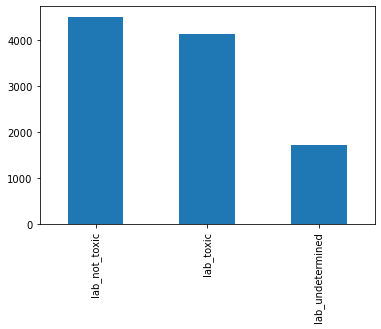

In [23]:
resultC['Labels'].value_counts().plot(kind='bar')

In [105]:
df = pd.read_csv("Annotation-data-test.csv")

In [106]:
df = df.drop('Unnamed: 0', 1)

C:\Users\anton\AppData\Local\Temp/ipykernel_27828/3812631323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


In [107]:
cols = df.iloc[:, 9:12]

In [108]:
def get_labels(row):
    for col in cols:
        if row[col] == 1:
            return col

df['Labels'] = df.apply(get_labels, axis=1)

In [109]:
df = df.drop(['id', 'post.nr', 'date', 'phaseType', 'Machine_Translation', 'toxicity', 'severe_toxicity', 'lab_toxic', 'lab_undetermined', 'lab_not_toxic'], axis = 1)

In [110]:
df['comment_text'] = df['comment.text']

In [111]:
df = df.drop(['comment.text'], axis = 1)

In [112]:
df = df.dropna()

In [113]:
le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Labels'])

<AxesSubplot:>

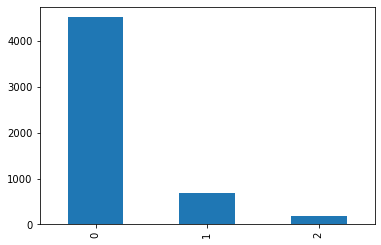

In [114]:
df['Labels'].value_counts().plot(kind='bar')

In [115]:
df_for_eval = df.sample(540)

<AxesSubplot:>

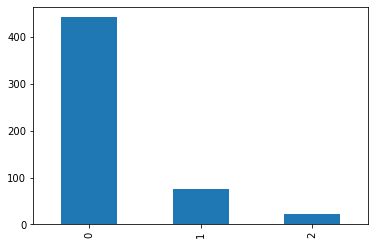

In [116]:
df_for_eval['Labels'].value_counts().plot(kind='bar')

In [117]:
df_for_eval

,n,Labels,comment_text
1494,11,0,här ses lastbilen susa förbi filmat från överv...
960,35,0,spendrups berättar att chauffören börjat lasta...
961,9,0,finns lite bilder på offer i kommentarerna fy...
1660,44,0,angående videoklippet på folk som flyr tit...
4383,10,0,fast det gör ju inte du heller i ditt inlägg
...,...,...,...
671,5,0,bild på den efterlyste mannen
1634,45,0,man gör en på riktigt personen tror alltså a...
4318,30,0,nyss spärrade man av e an norrut vid påfartern...
2278,5,0,blir ahmedov med våra bokstäver


In [118]:
result = result.drop(df_for_eval.index)

In [119]:
result

,n,Labels,comment_text
3,16.0,0,rapporterade avpixlat om för någon timme sedan...
4,24.0,0,hemskt det som hänt undra om det kommer en an...
5,55.0,0,det finns redan visst skydd på gatan bl a be...
6,34.0,0,det är helt omöjligt att köra med lastbil på d...
7,21.0,1,jimmie åkesson hade en längre utläggning i svt...
...,...,...,...
6216,59.0,2,frågan om det var planerat eller stundens ingi...
6217,NaN,2,samt ljuger de för allmänheten svensk polis i ...
6220,NaN,2,ok experten jag demolerar nu också mitt fantas...
6221,NaN,2,han ska inte vara med här punkt


In [120]:
df_for_eval.to_csv('df-for-eval-with-UD-final.csv', index = True, encoding = 'utf-8-sig')

In [121]:
result.to_csv('df-for-bert-with-UD-final.csv', index = True, encoding = 'utf-8-sig')